In [ ]:
!pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scipy
import numpy as np
import pandas as pd
from scipy.special import ellipeinc
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from matplotlib import markers

**Spatial resolution calculated orbit NEO 5587 (1990 SB)**

In [ ]:
#Input parameters
au = 1.496e+8 #[km]
a1 = 2.1953*au
A1 = 2.1953
e1 = 0.5528 
b1 = (A1**2)*(1-e1**2)
theta1 = 0.00469 # f(t)
parametro1=np.linspace(0,theta1,1000000) 


In [ ]:
R1=(((b1*np.cos(theta1))**2+(A1*np.sin(theta1))**2)**1.5)/(A1*b1) #Calculate radius of curvature
S1 = 2*np.pi*((A1**2+b1)/2)**(1/2)  #Calculate perimeter of the orbit
R1, S1

(5.1016199638482975, 12.696039872656455)

In [ ]:
d = a1*scipy.special.ellipeinc(parametro1,e1**2) #[km] #Calculation of the arc length 
arc1=(d[-1]/(S1*au))*100 #Calculation of spatial resolution (arc length/orbital perimeter)
d[-1],arc1 # arc length spatial resolution [km], fraction of orbit swept [%].

(1540273.4416508076, 0.08109572409074353)

In [ ]:
d[-1]/au

0.010295945465580264

**Spatial and temporal resolution calculated orbit NEO 4953 (1990 MU)**

In [ ]:
#Input parameters
a2 = 1.3721*au
A2 = 1.3721
e2 = 0.6512
b2 = (A2**2) *(1-e2**2)
theta2 = 0.00845
parametro2=np.linspace(0,theta2,1000000)


In [ ]:
R2=(((b2*np.cos(theta2))**2+(A2*np.sin(theta2))**2)**1.5)/(A2*b2) #Calculate radius of curvature
S2 = 2*np.pi*((A2**2+b2)/2)**(1/2) #Calculate perimeter of the orbit
R2, S2

(0.8569146623628637, 7.6527984547664)

In [ ]:
f= a2*scipy.special.ellipeinc(parametro2,e2**2) #[km] #Calculation of the arc length 
arc2=(f[-1]/(S2*au))*100 #Calculation of spatial resolution (arc length/orbital perimeter)
f[-1], arc2 # arc length spatial resolution [km], fraction of orbit swept [%].


(1734490.2989221995, 0.15150257201534473)

In [ ]:
f[-1]/au

0.011594186490121654

## Best approximate temporal resolution estimate NEO 5587(1990 SB)

In [ ]:
#Taking M=1
#G = 4*(np.pi**2)
mu = 132712440023.31 #[km^3*s^-2]
q1 = a1*(1-e1)
Q1 = a1*(1+e1)
r1=(a1*(1-e1**2))/(1+e1*np.cos(theta1))  #Calculation of the radiusvector after angular displacement theta1
q1, r1
#Speed at perihelion and theta
vp11 = np.sqrt(mu*(2/q1-(1/a1))) #[km/s]
vp21 = np.sqrt(mu*(2/r1-(1/a1))) #[km/s]
# Average time in which the arc lenght travels (True temporal resolution)
acc1 = mu/q1**2
TOC1 = ((-vp11+np.sqrt(vp11**2-2*acc1*d[-1]))/(-acc1))/3600 #quadratic solution [POC]Corrected orbital period
print('TOC in hours=',TOC1) #[h]
# SOC [corrected arc length]
vp11,vp21


TOC en horas= 11.460919399880195


(37.45846230579409, 37.45836785570407, 11.460919399880195)

## Best approximate temporal resolution estimate NEO 4953(1990 MU)

In [ ]:
#Taking M=11
#G = 4*(np.pi**2)
mu = 132712440023.31 #[km^3*s^-2]
q2 = a2*(1-e2)
Q2 = a2*(1+e2)
r2=(a2*(1-e2**2))/(1+e2*np.cos(theta2)) #Calculation of the radiusvector after angular displacement theta1
q2, r2
#Speed at perihelion and theta
vp12 = np.sqrt(mu*(2/q2-(1/a2))) #[km/s]
vp22 = np.sqrt(mu*(2/r1-(1/a2))) #[km/s]
# Average time in which the arc lenght travels (True temporal resolution)
acc2 = mu/q2**2
TOC2 = ((-vp12+np.sqrt(vp12**2-2*acc2*f[-1]))/(-acc2))/3600 #Quadratic solution [POC]Corrected orbital period
print('TOC in hours=',TOC2) #[h]
# SOC [corrected arc length]
vp12,vp22


TOC en horas= 8.773687827278378


(55.323384375501504, 34.06887866202722, 8.773687827278378)

## **Graphing radii of curvature of the inferred orbits**.

In [ ]:
#Body 1: 5587 (1990 SB) with R1 [Radius of curvature]

x_coor, y_coor = 7,4 #Coordinates of sun determined according to move of cartesian plane
T1 = 1356.025
T1 = int(1356*(24/TOC1)) #[days]
a1 = 2.1953
e1 = 0.5528 
k1 = np.linspace(0,2*np.pi,T1)

def kepler(e1,a1,k1):
  r = (a1*(1-e1**2))/(1+e1*np.cos(k1))
  return r

orbit = kepler(e1,a1,k1)

x1 = orbit*np.cos(k1)+x_coor
y1 = orbit*np.sin(k1)+y_coor
T1


2839

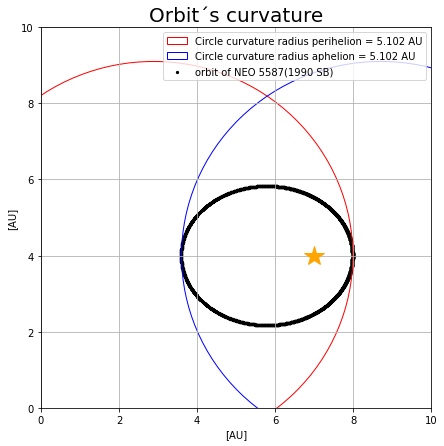

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
circle1=plt.Circle((1.94*q1/au+q1/au,y_coor),R1, fill=False, color='red', label=f'Circle curvature radius perihelion = {round(R1,3)} AU')
circle2=plt.Circle((x_coor+Q1/(2*au),y_coor),R1, fill=False, color='blue', label=f'Circle curvature radius aphelion = {round(R1,3)} AU')
ax.plot(x_coor,y_coor, marker="*", color="orange", markersize=20)
ax.set_title(r'Orbit´s curvature', size=20)
ax.scatter(x1,y1, 5, color='black', label='orbit of NEO 5587(1990 SB)')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xlabel('[AU]')
ax.set_ylabel('[AU]')
#ax.xaxis.set_minor_locator(MultipleLocator(ap/100));
#ax.yaxis.set_minor_locator(MultipleLocator(ap/100));

ax.grid()
ax.add_patch(circle1)
ax.add_patch(circle2)
ax.legend(loc="best");

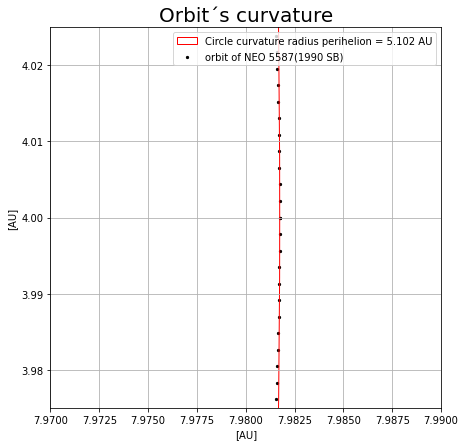

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
circle1=plt.Circle((x_coor-R1+q1/au,y_coor),R1, fill=False, color='red', label=f'Circle curvature radius perihelion = {round(R1,3)} AU')
#circle2=plt.Circle((6.82,y_coor),R1, fill=False, color='blue', label=f'Circle curvature radius aphelion = {round(R1,3)} AU')
ax.plot(x_coor,y_coor, marker="*", color="orange", markersize=20)
ax.set_title(r'Orbit´s curvature', size=20)
ax.scatter(x1,y1, 5, color='black', label='orbit of NEO 5587(1990 SB)')
ax.set_xlim(7.97,7.99)
ax.set_ylim(3.975,4.025)
ax.set_xlabel('[AU]')
ax.set_ylabel('[AU]')
ax.grid()
ax.add_patch(circle1)
#ax.add_patch(circle2)
ax.legend(loc="best");

In [ ]:
#Body 2: 4953(1990 MU) with R2 [Radius of curvature]

x_coor, y_coor = 7,4  #Coordinates of sun determined according to move of cartesian plane
T2 = 754.252
T2 = int(754*(24/TOC2)) #[days]
a2 = 2.1953
e2 = 0.5528 
k2 = np.linspace(0,2*np.pi,T2)

def kepler(e2,a2,k2):
  r = (a2*(1-e2**2))/(1+e2*np.cos(k2))
  return r

orbit2 = kepler(e2,a2,k2)

x2 = orbit2*np.cos(k2)+x_coor
y2 = orbit2*np.sin(k2)+y_coor
T2

2062

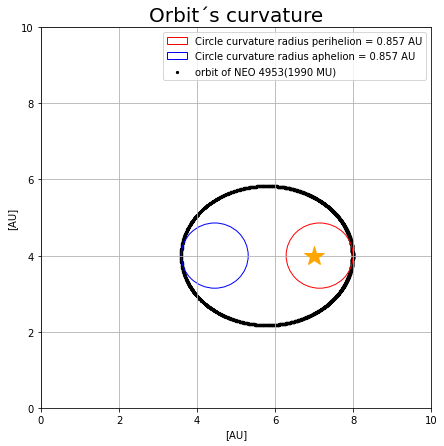

In [ ]:
#Body 2: 4953 (1990 MU) with R2 [Radius of curvature]

fig, ax = plt.subplots(figsize=(7,7))
circle12=plt.Circle((x_coor-Q2/(3.15*au)+R2,y_coor),R2, fill=False, color='red', label=f'Circle curvature radius perihelion = {round(R2,3)} AU')
circle22=plt.Circle((x_coor-R2-Q2/(1.34*au),y_coor),R2, fill=False, color='blue', label=f'Circle curvature radius aphelion = {round(R2,3)} AU')
ax.plot(x_coor,y_coor, marker="*", color="orange", markersize=20)
ax.set_title(r'Orbit´s curvature', size=20)
ax.scatter(x2,y2, 5, color='black', label='orbit of NEO 4953(1990 MU)')
ax.set_xlim(0,10)
ax.set_ylim(0,10)
ax.set_xlabel('[AU]')
ax.set_ylabel('[AU]')

ax.grid()
ax.add_patch(circle12)
ax.add_patch(circle22)
ax.legend(loc="best");

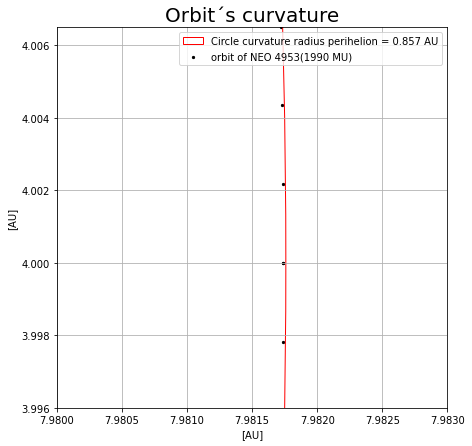

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
circle1=plt.Circle((x_coor-Q2/(3.0948*au)+R2,y_coor),R2, fill=False, color='red', label=f'Circle curvature radius perihelion = {round(R2,3)} AU')
#circle2=plt.Circle((6.82,y_coor),R1, fill=False, color='blue', label=f'Circle curvature radius aphelion = {round(R1,3)} AU')
ax.plot(x_coor,y_coor, marker="*", color="orange", markersize=20)
ax.set_title(r'Orbit´s curvature', size=20)
ax.scatter(x1,y1, 5, color='black', label='orbit of NEO 4953(1990 MU)')
ax.set_xlim(7.980,7.983)
ax.set_ylim(3.996,4.0065)
ax.set_xlabel('[AU]')
ax.set_ylabel('[AU]')
ax.grid()
ax.add_patch(circle1)
#ax.add_patch(circle2)
ax.legend(loc="best");